In [1]:
# Importando los módulos que necesitaremos
import pandas as pd
from datetime import datetime as DateTime
import numpy as np


# from pandas.plotting import table

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Configurando los estílos de los gráficos
plt.ioff()
sns.set_context('talk')
sns.set_style("whitegrid")

## Adquisición/Transformación de Datos

In [2]:
# Population

population = {
'PERÚ': 32625948,
'LIMA': 10628470,
'PIURA': 2047954,
'LA LIBERTAD': 2016771,
'AREQUIPA': 1497438,
'CAJAMARCA': 1453711,
'JUNIN': 1361467,
'CUSCO': 1357075,
'LAMBAYEQUE': 1310785,
'PUNO': 1237997,
'ANCASH': 1180638,
'CALLAO': 1129854,
'LORETO': 1027559,
'ICA': 975182,
'SAN MARTIN': 899648,
'HUANUCO': 760267,
'AYACUCHO': 668213,
'UCAYALI': 589110,
'APURIMAC': 430736,
'AMAZONAS': 426806,
'TACNA': 370974,
'HUANCAVELICA': 365317,
'PASCO': 271904,
'TUMBES': 251521,
'MOQUEGUA': 192740,
'MADRE DE DIOS': 173811
}

In [3]:
# PERU
files = os.listdir('data')

data = []
for fileName in files:
    date = fileName[:-4]
    count = len(pd.read_csv(f'data/{fileName}'))
    data.append((DateTime.strptime(date,'%Y-%m-%d'), count))

peru_df = pd.DataFrame(data, columns=('Date','Count'))
peru_df['Area'] = 'PERU'
peru_df['CountK'] = peru_df['Count'] / 1000
peru_df

,Date,Count,Area,CountK
0,2021-03-01,265608,PERU,265.608
1,2021-03-03,298832,PERU,298.832
2,2021-03-04,314197,PERU,314.197
3,2021-03-10,423934,PERU,423.934
4,2021-03-16,549416,PERU,549.416
5,2021-04-03,857493,PERU,857.493


In [4]:
# POR DEPARTAMENTO
col_list = ["UUID", "DEPARTAMENTO"]

data = []
for fileName in files:
    date = fileName[:-4]
    fileData = pd.read_csv(f'data/{fileName}', usecols=col_list)
    gb = fileData.groupby(by=['DEPARTAMENTO'])
    for item in gb:
        departmentData = {
            'Date': DateTime.strptime(date,'%Y-%m-%d'),
            'Count': len(item[1]),
            'Area': item[0],
            'CountK': len(item[1])/1000
        }
        data.append(departmentData)

departments_df = pd.DataFrame(data, columns=['Date','Count','Area','CountK'])
departments_df

,Date,Count,Area,CountK
0,2021-03-01,4374,AMAZONAS,4.374
1,2021-03-01,8310,ANCASH,8.310
2,2021-03-01,6011,APURIMAC,6.011
3,2021-03-01,14106,AREQUIPA,14.106
4,2021-03-01,7102,AYACUCHO,7.102
...,...,...,...,...
145,2021-04-03,18363,PUNO,18.363
146,2021-04-03,22477,SAN MARTIN,22.477
147,2021-04-03,9517,TACNA,9.517
148,2021-04-03,5795,TUMBES,5.795


## Visualización de Datos

In [5]:
dates_range = (peru_df['Date'].iat[0],peru_df['Date'].iat[-1])

<Figure size 432x288 with 0 Axes>

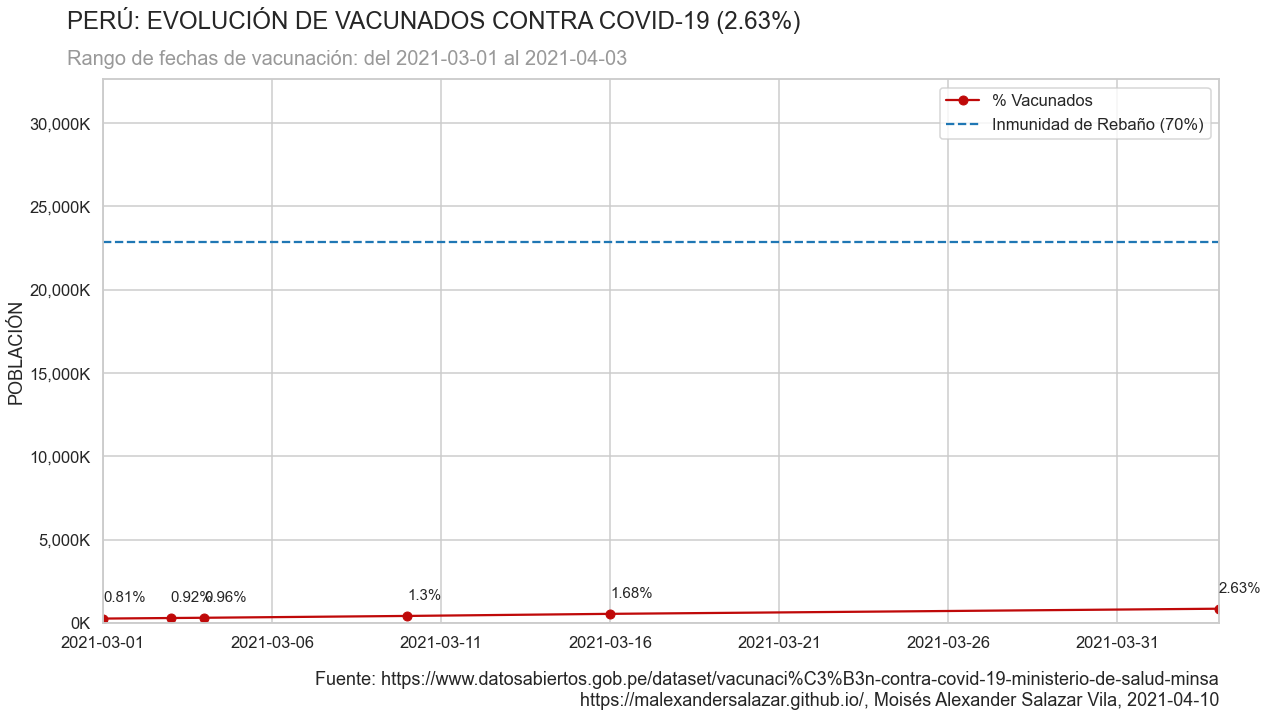

In [8]:
data = peru_df
area = 'PERÚ'

# Creamos la figura, los ejes y agregamos la atribución
plt.clf()

fig, axs = plt.subplots(figsize=(20,10))
plt.figtext(0.1,0.95, area + ': EVOLUCIÓN DE VACUNADOS CONTRA COVID-19 (' + str(round(data['Count'].iat[-1]*100/population[area],2)) + '%)', ha='left', fontsize=24)
plt.figtext(0.1,0.90, 'Rango de fechas de vacunación: del {} al {}'.format(f'{dates_range[0]:%Y-%m-%d}',f'{dates_range[1]:%Y-%m-%d}'), ha='left', fontsize=20, color='#999')
plt.figtext(0.9,0.01, """Fuente: https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa
https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}', ha='right')

formatter = mdates.DateFormatter("%Y-%m-%d")
locator = mdates.DayLocator(interval=5)

axs.xaxis.set_major_formatter(formatter)
axs.xaxis.set_major_locator(locator)
axs.yaxis.set_major_formatter('{x:,.0f}K')

# Dibujamos linea horizontal para señalar la meta
axs.hlines(population[area]/1000 * 70/100, dates_range[0], dates_range[1], linestyles= 'dashed', label='Inmunidad de Rebaño (70%)')

# Graficamos los datos
axs.plot(data['Date'], data['CountK'], 'o-', color='#bf0909', label='% Vacunados')

axs.set_xlim(dates_range)
axs.set_ylim([0,population[area]/1000])
axs.set_ylabel('POBLACIÓN')

for i in range(len(data)):
    axs.text(data['Date'].iat[i], data['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data['Count'].iat[i]*100/population[area],2)) + '%', fontsize='small')

plt.legend()
plt.show()

In [62]:
def generate_plot(area, data, dates_range, show_plot=False, save_plot=True):

    # Creamos la figura, los ejes y agregamos la atribución
    plt.clf()

    fig, axs = plt.subplots(figsize=(20,10))
    plt.figtext(0.1,0.95, area + ': EVOLUCIÓN DE VACUNADOS CONTRA COVID-19 (' + str(round(data['Count'].iat[-1]*100/population[area],2)) + '%)', ha='left', fontsize=24)
    plt.figtext(0.1,0.90, 'Rango de fechas de vacunación: del {} al {}'.format(f'{dates_range[0]:%Y-%m-%d}',f'{dates_range[1]:%Y-%m-%d}'), ha='left', fontsize=20, color='#999')
    plt.figtext(0.9,0.01, """Fuente: https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa
    https://malexandersalazar.github.io/, Moisés Alexander Salazar Vila, """ + f'{DateTime.now():%Y-%m-%d}', ha='right')

    formatter = mdates.DateFormatter("%Y-%m-%d")
    locator = mdates.DayLocator(interval=5)

    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(locator)
    axs.yaxis.set_major_formatter('{x:,.0f}K')

    # Dibujamos linea horizontal para señalar la meta
    axs.hlines(population[area]/1000 * 70/100, dates_range[0], dates_range[1], linestyles= 'dashed', label='Inmunidad de Rebaño (70%)')

    # Graficamos los datos
    axs.plot(data['Date'], data['CountK'], 'o-', color='#bf0909', label='% Vacunados')

    axs.set_xlim(dates_range)
    axs.set_ylim([0,population[area]/1000])
    axs.set_ylabel('POBLACIÓN')

    for i in range(len(data)):
        axs.text(data['Date'].iat[i], data['CountK'].iat[i] + population[area]/1000 * 3/100, str(round(data['Count'].iat[i]*100/population[area],2)) + '%')

    plt.legend()
    ## 3. Mostramos, guardamos y generamos el Markdown para las imágenes

    sns.despine(left=False, bottom=False)

    if save_plot:
        filename = 'dist/{}_{}.png'.format(f'{DateTime.now():%Y%m%d}', area.replace(' ', '_'))
        plt.savefig("../" + filename, bbox_inches='tight')
        with open("../dist/images.txt", "a", encoding='utf-8') as f:
            f.write('![alt text]({} "{}")\n\n'.format(filename, area))

    if show_plot:
        plt.show()

In [63]:
# Eliminando archivo generado para el Markdown de las imágenes
if os.path.exists("../dist/images.txt"):
    os.remove("../dist/images.txt")

In [65]:
# Perú
generate_plot('PERÚ', peru_df, (peru_df['Date'].iat[0],peru_df['Date'].iat[-1]), False, True)

In [66]:
# Deparmanetos
departments_ordered = np.sort(departments_df['Area'].unique())
for d in departments_ordered:
    data = departments_df[departments_df['Area'] == d]
    generate_plot(d, data, (peru_df['Date'].iat[0],peru_df['Date'].iat[-1]), False, True)

<ipython-input-62-ccae00e11f21>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize=(20,10))
